In [1]:
conda install -c mikesilva xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("D:\\datamining\\adult20.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,yes
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,yes
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,yes
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,yes
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,yes


In [4]:
y_mapping={"no":0 ,"yes":1}
workclass_mapping={" State-gov":0 , " Self-emp-not-inc":1 , " Private":2 , " Federal-gov":3 , " Self-emp-inc":4 , " Local-gov":5 , " Without-pay":6}
education_mapping={' Bachelors':0, ' Some-college':1, ' 11th':2, ' HS-grad':3, ' Prof-school':4, 
                   ' Assoc-acdm':5, ' Assoc-voc':6, ' 9th':7, ' 7th-8th':8, ' 12th':9, ' Masters':10, 
                   ' 1st-4th':11, ' 10th':12, ' Doctorate':13, ' 5th-6th':14, ' Preschool':15}
marital_status_mapping={' Married-civ-spouse':0, ' Divorced':1, ' Never-married':2, ' Separated':3, ' Widowed':4, 
                        ' Married-spouse-absent':5, ' Married-AF-spouse':6}
occupation_mapping={' Tech-support':0, ' Craft-repair':1, ' Other-service':2, ' Sales':3, ' Exec-managerial':4, 
                    ' Prof-specialty':5, ' Handlers-cleaners':6, ' Machine-op-inspct':7, ' Adm-clerical':8, ' Farming-fishing':9, 
                    ' Transport-moving':10, ' Priv-house-serv':11, ' Protective-serv':12, ' Armed-Forces':13}
relationship_mapping={' Wife':0, ' Own-child':1, ' Husband':2, ' Not-in-family':3, ' Other-relative':4, ' Unmarried':5}
race_mapping={' White':0, ' Asian-Pac-Islander':1, ' Amer-Indian-Eskimo':2, ' Other':3, ' Black':4}
sex_mapping={' Female':0 , ' Male':1}
native_country_mapping={' Cambodia':0,' Canada':1,' China':2,' Columbia':3,' Cuba':4,' Dominican-Republic':5,' Ecuador':6,
                        ' El-Salvador':7,' England':8,' France':9,' Germany':10,' Greece':11,' Guatemala':12,' Haiti':13,
                        ' Honduras':14,' Hong':15,' India':16,' Iran':17,' Ireland':18,' Italy':19,' Jamaica':20,' Mexico':21,
                        ' Laos':22,' Japan':23,' Outlying-US(Guam-USVI-etc)':24,' Nicaragua':25,' Philippines':26,' Poland':27,
                        ' Peru':28,' Puerto-Rico':29,' Portugal':30,' South':31,' Scotland':32,' Thailand':33,' Taiwan':34,
                        ' Trinadad&Tobago':35,' United-States':36,' Yugoslavia':37,' Vietnam':38}


df['y']=df['y'].map(y_mapping)
df['workclass']=df['workclass'].map(workclass_mapping)
df['education']=df['education'].map(education_mapping)
df['marital_status']=df['marital_status'].map(marital_status_mapping)
df['occupation']=df['occupation'].map(occupation_mapping)
df['relationship']=df['relationship'].map(relationship_mapping)
df['race']=df['race'].map(race_mapping)
df['sex']=df['sex'].map(sex_mapping)
df['native_country']=df['native_country'].map(native_country_mapping)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,39,0,77516,0,13,2,8,3,0,1,2174,0,40,36,1
1,50,1,83311,0,13,0,4,2,0,1,0,0,13,36,1
2,38,2,215646,3,9,1,6,3,0,1,0,0,40,36,1
3,53,2,234721,2,7,0,6,2,4,1,0,0,40,36,1
4,28,2,338409,0,13,0,5,0,4,0,0,0,40,4,1


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(labels=['y'],axis=1).values # 移除Species並取得剩下欄位資料
y = df['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (4516, 14)
test shape: (1936, 14)


In [6]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)

[21:02:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [7]:
# 預測成功的比例
print('訓練集: ',xgboostModel.score(X_train,y_train))
print('測試集: ',xgboostModel.score(X_test,y_test))

訓練集:  0.9685562444641276
測試集:  0.8527892561983471


特徵重要程度:  [0.0318279  0.02862377 0.02140771 0.02131199 0.08801973 0.47891986
 0.03502414 0.02828993 0.02711244 0.02737224 0.10985895 0.05359211
 0.02812852 0.02051053]


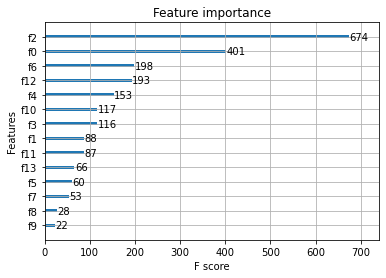

In [8]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgboostModel)
print('特徵重要程度: ',xgboostModel.feature_importances_)

In [9]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ["age","workclass","fnlwgt","education","education_num","marital_status",
                                       "occupation","relationship","race","sex","capital_gain","capital_loss",
                                       "hours_per_week","native_country"])
df_test['y'] = y_test
pred = xgboostModel.predict(X_test)
df_test['Predict'] = pred

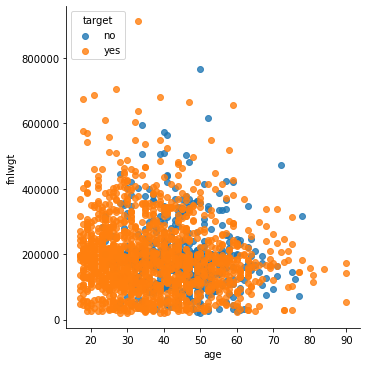

In [12]:
#真實分類
sns.lmplot(x="age", y="fnlwgt", hue="y", data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=["no","yes"])
plt.show()

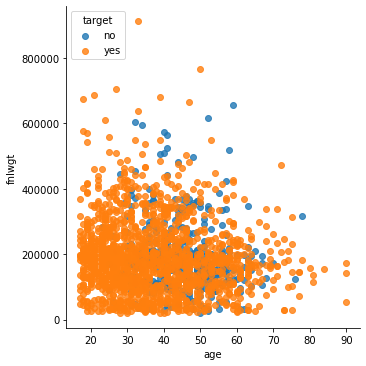

In [13]:
#XGBoost (訓練集)預測結果
sns.lmplot(x="age", y="fnlwgt", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=["no","yes"])
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,pred)
print("MAE: ",mae)

MAE:  0.1472107438016529


In [15]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

RMSE:  0.38368052309395756


In [16]:
mape = mean_absolute_error(y_test,pred)*100
print("MAPE: ",mape)

MAPE:  14.72107438016529
